Для побудови графа переходів системи «Сад» з одного стану до іншого, необхідно спочатку визначити всі можливі стани системи. 
Оскільки система може перебувати у 4 станах, ми позначимо їх як A, B, C та D. 

Нехай на початку періоду спостереження система перебуває:
    у стані A з ймовірністю 0.3,
    у стані B з ймовірністю 0.2, 
    у стані C з ймовірністю 0.4 
    і у стані D з ймовірністю 0.1. 
    Тоді початкові ймовірності можна записати у вигляді вектора:

In [1]:
import numpy as np

# вектор початкових ймовірностей
p_0 = np.array([0.3, 0.2, 0.4, 0.1])


Далі, ми встановлюємо ймовірності переходу між станами, що можуть бути будь-якими значеннями, які відповідають реальному використанню системи.

In [2]:
# матриця ймовірностей переходів
P = np.array([
    [0.6, 0.2, 0.1, 0.1],
    [0.3, 0.3, 0.2, 0.2],
    [0.1, 0.2, 0.4, 0.3],
    [0.2, 0.2, 0.3, 0.3]
])

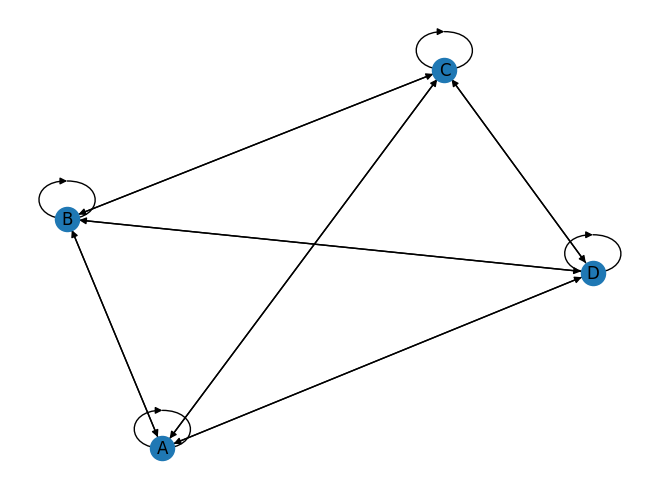

In [4]:
# побудова Марковського графа
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_nodes_from(['A', 'B', 'C', 'D'])
for i in range(P.shape[0]):
    for j in range(P.shape[1]):
        if P[i,j] > 0:
            G.add_edge(['A', 'B', 'C', 'D'][i], ['A', 'B', 'C', 'D'][j], weight=P[i,j])
            
# відображення Марковського графа
nx.draw(G, with_labels=True)
plt.show()


Щоб знайти ймовірності станів системи через 5 діб, ми можемо використати формулу Марківського ланцюга для n кроків:
                P(n) = P(0) * P^n
    де  P(n) - вектор ймовірностей станів системи через n діб,
        P(0) - вектор початкових ймовірностей станів,
        P - матриця ймовірностей переходів, а n - кількість кроків.
Отже, для визначення ймовірностей станів системи через 5 діб нам потрібно скористатися 
    матрицею ймовірностей переходів 
    та вектором початкових ймовірностей

In [6]:
# Обчислення ймовірностей через 5 діб

# Знаходимо степінь матриці переходів
P_5 = np.linalg.matrix_power(P, 5)

probabilities_after_5_days = np.dot(p_0, P_5)

# Виведення результату
print(probabilities_after_5_days)

[0.329738 0.222222 0.235862 0.212178]


In [9]:
# Знаходимо суму всіх елементів вектора probabilities_after_5_days
sum_probabilities_after_5_days = np.sum(probabilities_after_5_days)

print(sum_probabilities_after_5_days)

1.0
